In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
# Import the train_test_split function from the sklearn library
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor

In [4]:
# load the dataset
df = pd.read_csv('/content/drive/My Drive/GuwahatiCovidcsv.csv')
df.head()

,From Date,PM2.5,NO2,Ozone,RH,WS,WD,SR,BP,RF,AT
0,18-02-2019 00:00,58.04,6.40,15.73,NaN,1.86,229.44,0.22,1002.19,0.00,20.87
1,18-02-2019 01:00,60.00,6.08,18.36,NaN,1.54,217.20,1.46,956.00,0.24,18.92
2,18-02-2019 02:00,55.50,6.71,34.54,NaN,0.66,197.21,NaN,1001.60,0.00,18.33
3,18-02-2019 03:00,66.56,7.00,31.85,NaN,0.61,206.44,NaN,1001.41,0.00,17.63
4,18-02-2019 04:00,67.08,9.45,24.07,NaN,0.54,230.53,NaN,980.67,0.00,16.61


In [18]:
# # Drop the Unnamed: 0 column from the dataframe
# df = df.drop(columns=["Ozone" , "RH" , "WS" , "WD" , "SR"])

# # Display the number of missing values in each column of the dataframe
# df.isna().sum()

In [9]:
df.describe().T ##Gebratinf Statistics of the Dataframe

,count,mean,std,min,25%,50%,75%,max
PM2.5,31251.0,59.698638,64.917579,0.06,18.00,36.03,80.565,923.08
NO2,32393.0,9.837276,11.218250,0.02,2.68,5.53,12.420,107.04
BP,21876.0,971.844817,42.149473,703.14,961.60,993.75,997.910,1011.81
RF,32623.0,0.080119,0.237095,0.00,0.00,0.00,0.000,3.75
AT,31462.0,24.751995,5.071380,6.17,21.43,25.50,28.350,38.20


In [28]:
df = df.drop(columns=["From Date"])

In [32]:
X = df.drop(columns=["PM2.5"])  ##cause we are predicting
y = df['PM2.5']

X.head()

,NO2,BP,RF,AT
0,6.40,1002.19,0.00,20.87
1,6.08,956.00,0.24,18.92
2,6.71,1001.60,0.00,18.33
3,7.00,1001.41,0.00,17.63
4,9.45,980.67,0.00,16.61


In [59]:
# Split the feature matrix X and the target vector y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
X_train = X_train.dropna()
y_train = y_train.dropna()

In [61]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
y_train = y_train[:17402]   ###making the x_train and y_train equal  by deleting rows *imp [step]
X_train = X_train[:25019]

In [67]:
from sklearn.ensemble import HistGradientBoostingRegressor
# Initializing the model
model = RandomForestRegressor(n_estimators=100, max_depth=100)
model = HistGradientBoostingRegressor()
model.fit(X_train, y_train)


HistGradientBoostingRegressor()

In [68]:
import pandas as pd

X_train = pd.DataFrame(X_train, columns=['NO2' , 	'BP' , 	'RF' , 	'AT'])

missing_values_X = X_train.isnull().sum()
missing_values_y = y_train.isnull().sum()

Text(0, 0.5, 'Predicted')

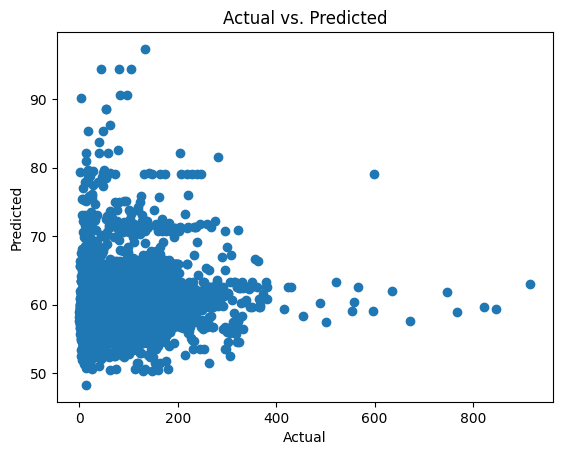

In [70]:
# Making predictions on the test data
y_pred = model.predict(X_test)


# Plotting a scatter plot to compare actual vs predicted values
plt.scatter(y_test, y_pred)
plt.title("Actual vs. Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [75]:
# genetic algorithm search for continuous function optimization
from numpy.random import randint
from numpy.random import rand
import math

In [76]:
def obj_fun(X):
    """
    This function takes a list X as input and returns the negative result of
    model.predict.


    Parameters:
    X (list): A list of values.

    Returns:
    float: The negative of the prediction result from the full model.
    """

    # Converting X into a list of lists to make it compatible for model prediction
    X = [X]

    # Getting the prediction result from the full model
    results = model_full.predict(X)

    # Returning the negative of the prediction result
    return -results

In [77]:
def decode(bounds, n_bits, bitstring):
    """
    Decode binary bitstring to numbers for each input and scale the value to fall within the defined bounds.

    Parameters:
    bounds (list): A list of tuples that define the lower and upper bounds for each decoded value.
    n_bits (int): The number of bits used to represent each decoded value.
    bitstring (str): A binary string to be decoded.

    Returns:
    list: A list of decoded and scaled values.
    """
    decoded = list()  # Create empty list to hold the decoded values
    largest = 2**n_bits  # Largest value - for 16 bit this would be 65536
    for i in range(len(bounds)):
        # extract the substring
        start, end = i * n_bits, (i * n_bits) + n_bits  # Define start and end indices corresponding to each substring
        substring = bitstring[start:end]  # Extract the substring corresponding to each value
        # convert bitstring to a string of chars
        chars = ''.join([str(s) for s in substring])  # Join all values in the substring together, into chars from a list
        # convert string to integer
        integer = int(chars, 2)  # Convert a base-2 binary number string into an int
        # scale integer to desired range
        value = bounds[i][0] + (integer / largest) * (bounds[i][1] - bounds[i][0])  # Scale to a value between our defined bounds
        # store
        decoded.append(value)
    return decoded

In [78]:
"""
The following code implements three functions that are part of a genetic algorithm: tournament selection, crossover, and mutation.

The selection function selects a candidate from the population for further processing, based on their score.
The crossover function takes two parent candidates and creates two children from them. It has a crossover rate parameter that determines the likelihood of recombination.
The mutation function mutates a candidate string, flipping bits with a certain probability determined by the mutation rate.
"""

def selection(pop, scores, k=3):
    """
    Select the best individuals for the next generation based on their fitness (scores).
    This function randomly selects k individuals from the population and performs a tournament
    among them to choose the one with the best score.

    Parameters:
    pop (list): The population of individuals.
    scores (list): The fitness scores for each individual in the population.
    k (int, optional): The number of individuals to select from the population for the tournament.
                        Defaults to 3.

    Returns:
    individual: The best individual from the tournament.
    """
    # Randomly select one index from the population as the initial selection
    selection_ix = randint(len(pop))
    # Perform a tournament among k randomly selected individuals
    for ix in randint(0, len(pop), k-1):
        # Check if the current individual has a better score than the selected one
        if scores[ix] < scores[selection_ix]:
            # Update the selected individual if a better one is found
            selection_ix = ix
    # Return the best individual from the tournament
    return pop[selection_ix]

def crossover(p1, p2, r_cross):
    """
    Create two children from two parents using the crossover operation.
    The children are created by copying the parents, and recombination occurs
    if a random value is less than the crossover rate.

    Parameters:
    p1 (list): The first parent.
    p2 (list): The second parent.
    r_cross (float): The crossover rate.

    Returns:
    list: A list containing the two children.
    """
    # Children are copies of the parents by default
    c1, c2 = p1.copy(), p2.copy()
    # Check if recombination should occur
    if rand() < r_cross:
        # Select a crossover point (not at the end of the string)
        pt = randint(1, len(p1)-2)
        # Perform crossover in the children
        c1 = p1[:pt] + p2[pt:]
        c2 = p2[:pt] + p1[pt:]
    # Return the two children
    return [c1, c2]


import random

def mutation(bitstring, r_mut):
    """
    The mutation process changes the value of some features in the offspring at random to maintain the diversity in the population.
    A standard value for the mutation rate is 1/m where m is the number of features.

    Parameters:
    bitstring (list): A list of binary values representing the offspring
    r_mut (float): The mutation rate, typically 1/m where m is the number of features

    Returns:
    list: The modified bitstring after mutation

    """
    rand = random.random
    for i in range(len(bitstring)):
        # Check for a mutation
        if rand() < r_mut:
            # Flip the bit
            bitstring[i] = 1 - bitstring[i]
    return bitstring


In [79]:
### Putting all together into our Genetic algorithm that runs until it finds the best
#The whole fitness assignment, selection, recombination, and mutation process is
#repeated until a stopping criterion is satisfied.
#Each generation is likely to be more adapted to the environment than the old one.

# genetic algorithm implementation
def genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut):
    """
    The genetic algorithm that finds the optimal solution by performing the fitness assignment, selection, recombination, and mutation process repeatedly.
    Each iteration, the solution is more adapted to the environment.

    Parameters
    ----------
    objective: function
        The objective function that needs to be optimized.
    bounds: list of tuples
        The bounds of the solution.
    n_bits: int
        The number of bits used to encode the solution.
    n_iter: int
        The number of iterations to perform.
    n_pop: int
        The size of the population.
    r_cross: float
        The crossover rate.
    r_mut: float
        The mutation rate.

    Returns
    -------
    list
        The best solution and its evaluation.
    """
    # initialize the population with random bitstrings
    pop = [randint(0, 2, n_bits * len(bounds)).tolist() for _ in range(n_pop)]

    # track the best solution found so far
    best, best_eval = 0, objective(decode(bounds, n_bits, pop[0]))

    # iterate over generations
    for gen in range(n_iter):
        # decode the population
        decoded = [decode(bounds, n_bits, p) for p in pop]
        # evaluate all candidates in the population
        scores = [objective(d) for d in decoded]
        # check for a new best solution
        for i in range(n_pop):
            if scores[i] < best_eval:
                best, best_eval = pop[i], scores[i]
                print(">%d, new best f(%s) = %f" % (gen,  decoded[i], scores[i]))

        # select parents
        selected = [selection(pop, scores) for _ in range(n_pop)]

        # create the next generation - children
        children = list()
        for i in range(0, n_pop, 2):
            # get selected parents in pairs
            p1, p2 = selected[i], selected[i + 1]
            # crossover and mutation
            for c in crossover(p1, p2, r_cross):
                # mutation
                mutation(c, r_mut)
                # store for next generation
                children.append(c)
        # replace the population
        pop = children
    return [best, best_eval]

In [ ]:
# https://colab.research.google.com/github/bnsreenu/python_for_microscopists/blob/master/315_Optimization_using_Genetic_Algorithm_Heart_disease.ipynb#scrollTo=pnxGCcB4tsN6